In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/selected_features_on_spambase.csv')
df.shape

(4210, 46)

In [3]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,...,word_freq_original,word_freq_re,word_freq_edu,char_freq_%28,char_freq_%21,char_freq_%24,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000,0.778,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.14,0.28,0.21,0.07,0.00,0.94,0.21,...,0.00,0.00,0.00,0.132,0.372,0.180,5.114,101,1028,1
2,0.06,0.00,0.71,1.23,0.19,0.19,0.12,0.64,0.25,0.38,...,0.12,0.06,0.06,0.143,0.276,0.184,9.821,485,2259,1
3,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.00,0.00,0.137,0.137,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,...,0.00,0.00,0.00,0.135,0.135,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.31,0.00,0.62,0.00,0.31,0.00,0.00,0.00,0.00,0.00,...,0.00,0.31,0.31,0.232,0.000,0.000,1.142,3,88,0
4206,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,2.00,0.000,0.353,0.000,1.555,4,14,0
4207,0.30,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.20,0.718,0.000,0.000,1.404,6,118,0
4208,0.96,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.32,0.057,0.000,0.000,1.147,5,78,0


Let's visualize the class (Target) Balance

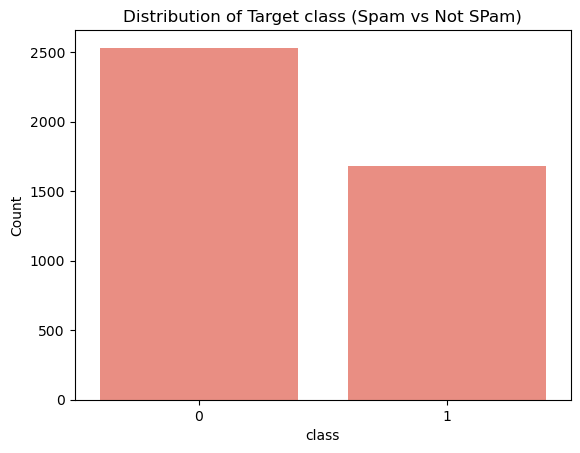

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['class'], color='salmon')
plt.title('Distribution of Target class (Spam vs Not SPam)')
plt.ylabel('Count')
plt.show()

Feature Correlation with Target

<Axes: >

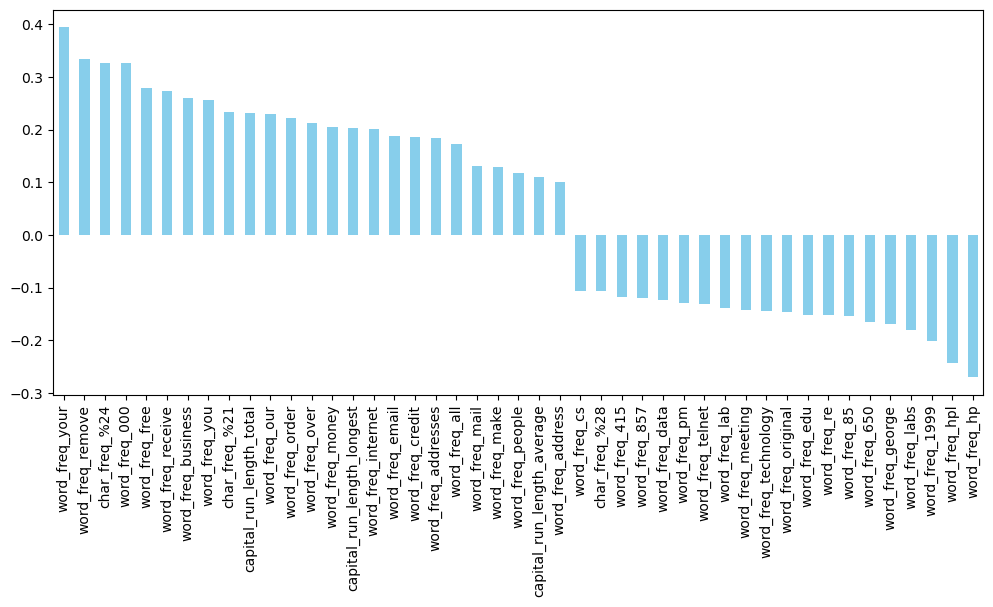

In [5]:
corr = df.corr()['class'].drop('class')
corr.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), color='skyblue')

<Axes: >

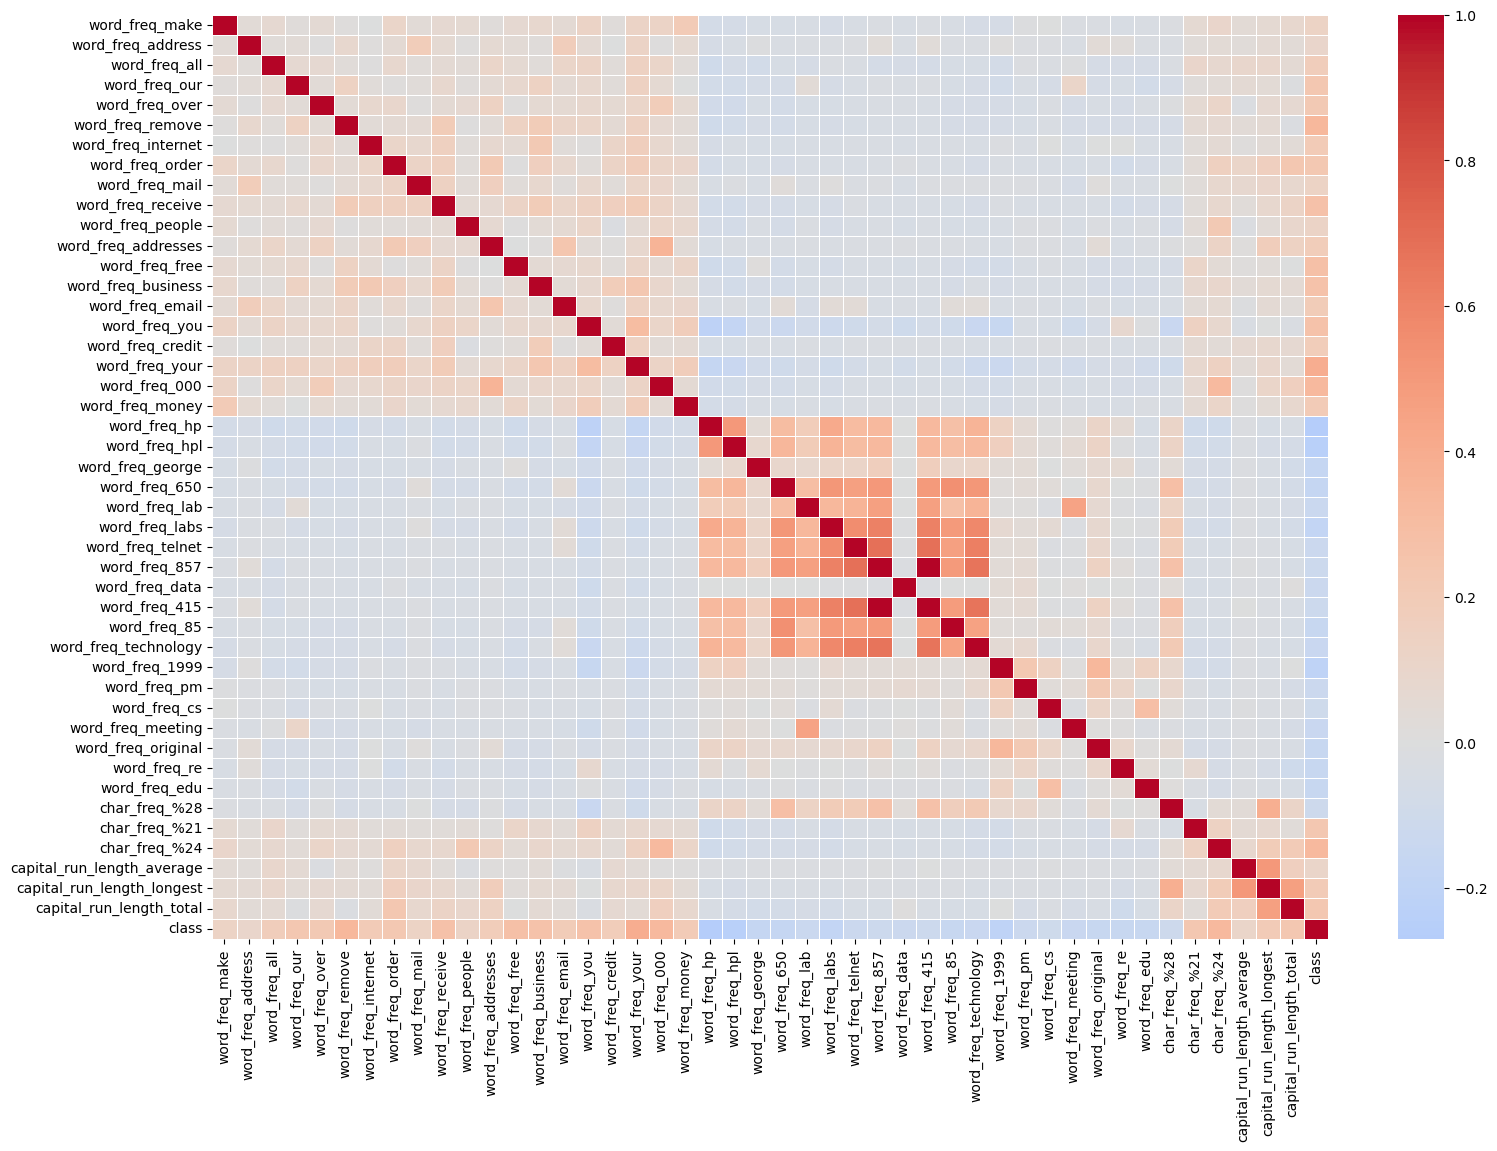

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0, linewidths=0.5)

Let's visualize the distributions of Top Spam Features

This heatmap provides a visual summary of how features in the dataset are correlated. While most features show low correlation—indicating that they provide unique information—some, such as word_freq_lab vs word_freq_labs, and the capital letter-related features, exhibit strong positive correlation. This insight is useful for detecting redundancy and guiding feature selection for model optimization.

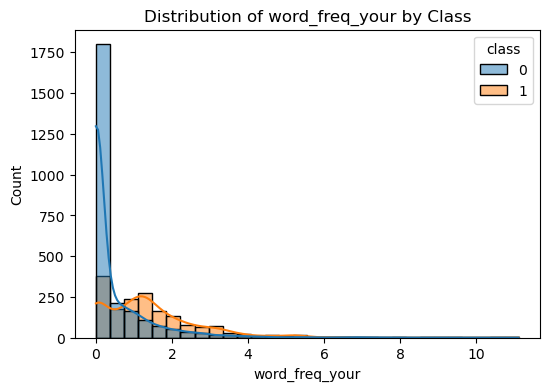

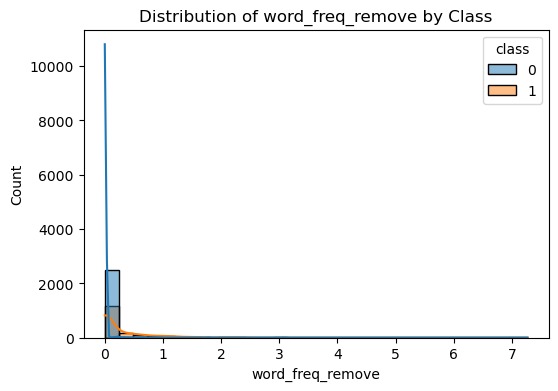

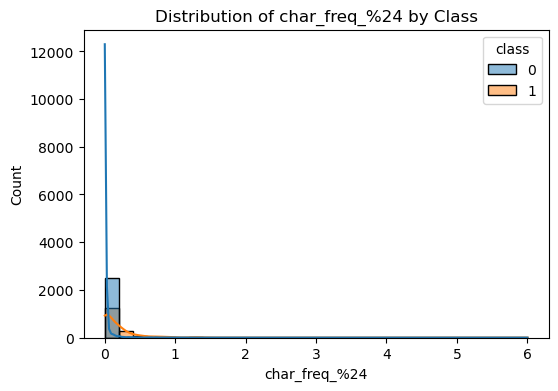

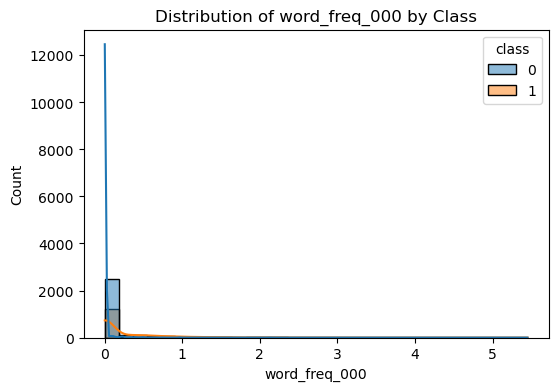

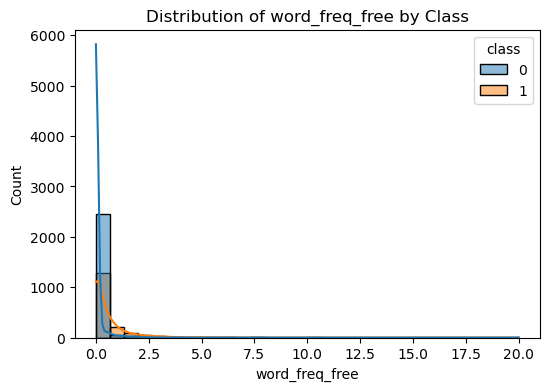

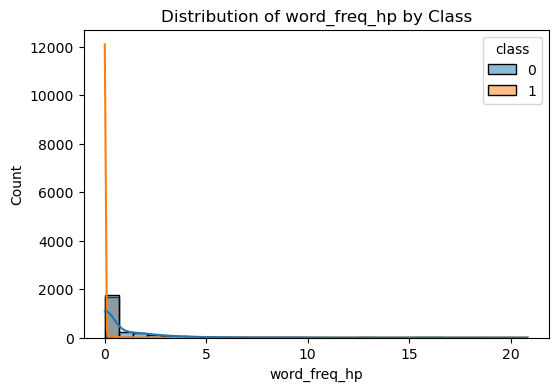

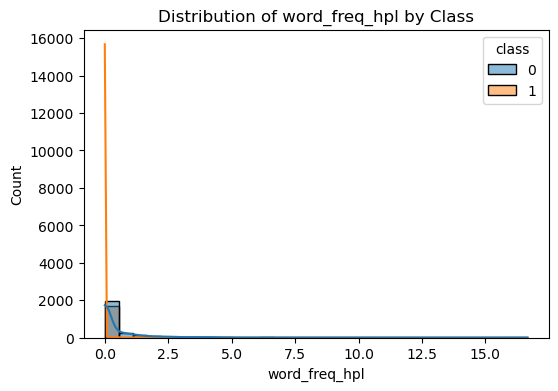

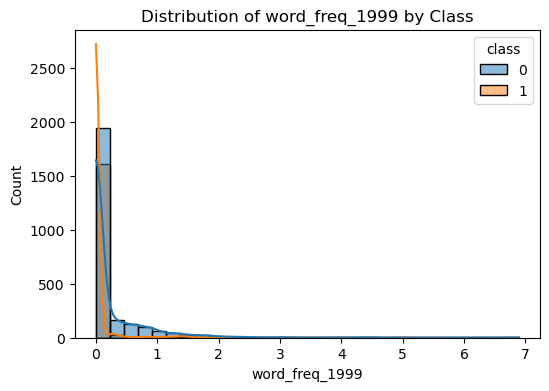

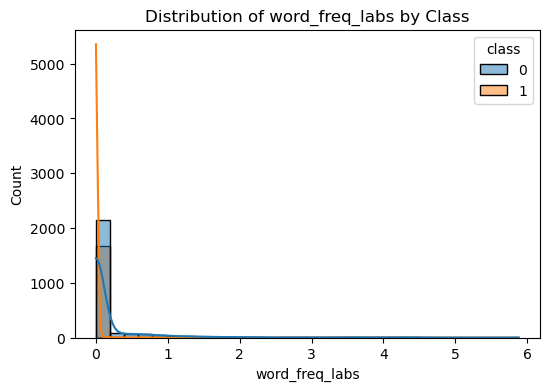

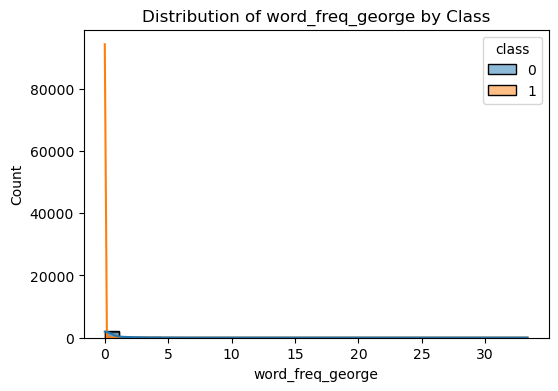

In [7]:
top_pos = corr.sort_values(ascending=False).head(5).index
top_neg = corr.sort_values().head(5).index
top_features = list(top_pos) + list(top_neg)

for col in top_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='class', bins=30, kde=True)
    plt.title(f'Distribution of {col} by Class')
    plt.show()

- The words “your”, "remove", "$", "000", "free" appears more frequently in spam emails than non-spam emails.
- The words "hp", "hpl", "1999", "labs", "george" appears more frequently in non_spam than spam emails.

Let's vidualize it in boxplot for more clarification!

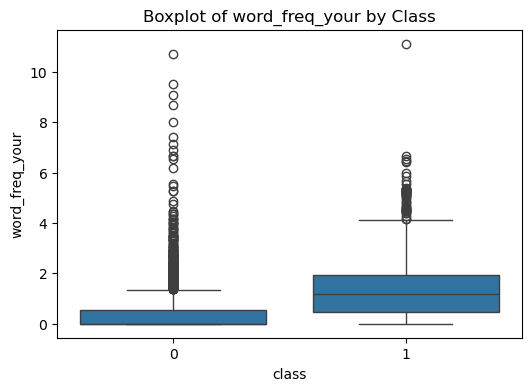

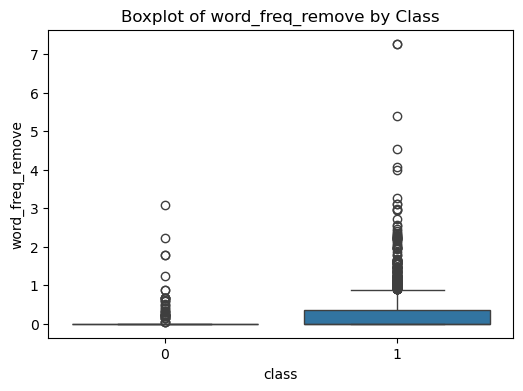

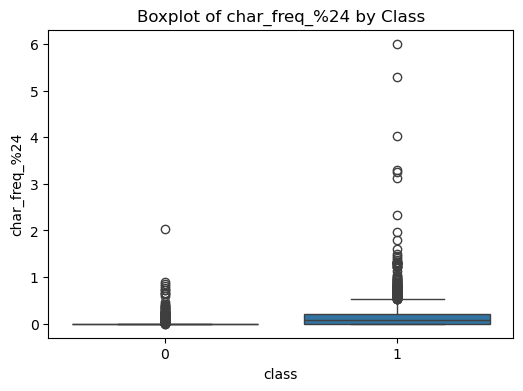

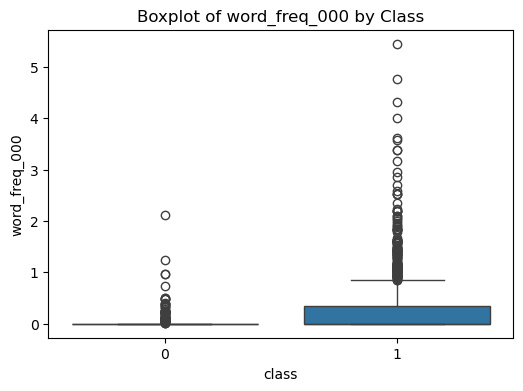

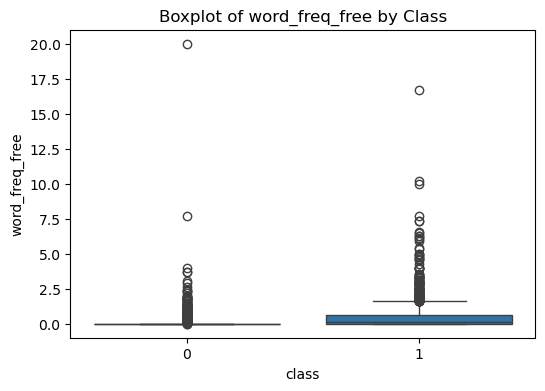

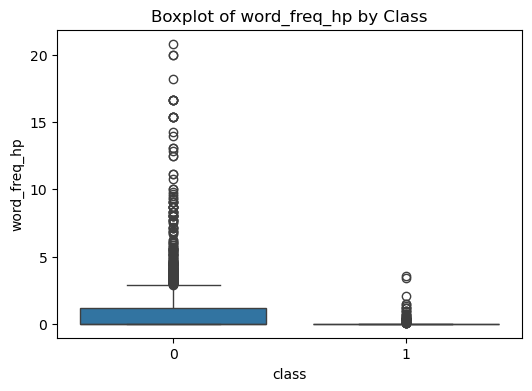

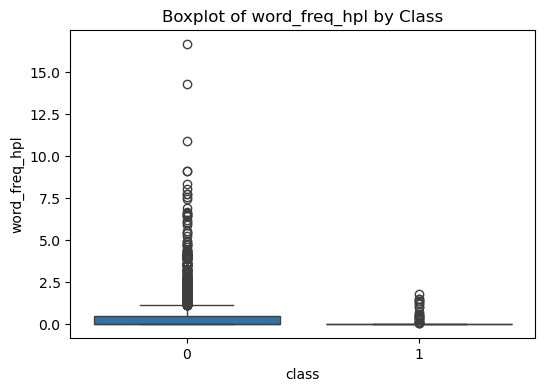

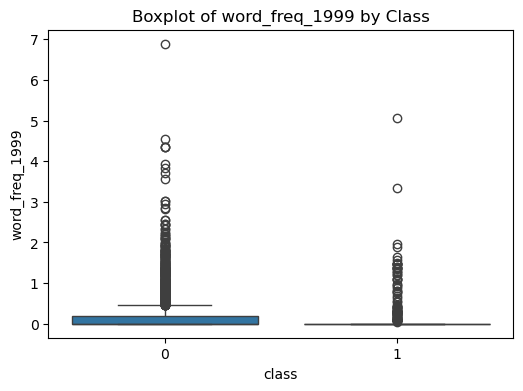

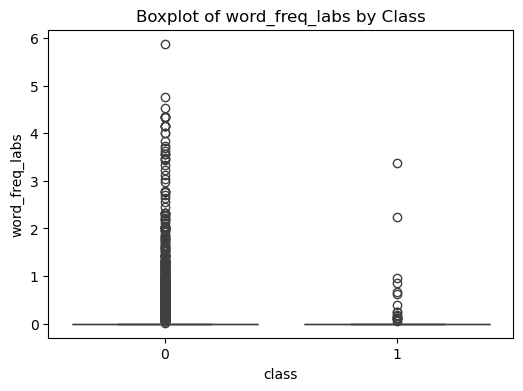

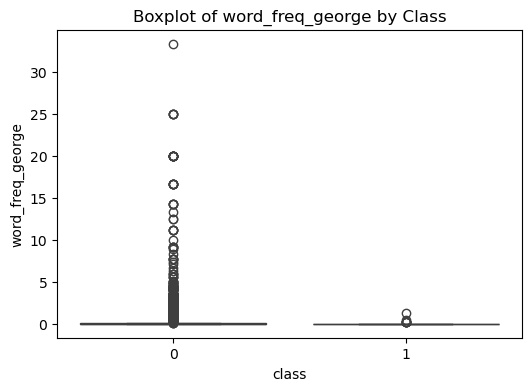

In [8]:
for col in top_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'Boxplot of {col} by Class')
    plt.show()

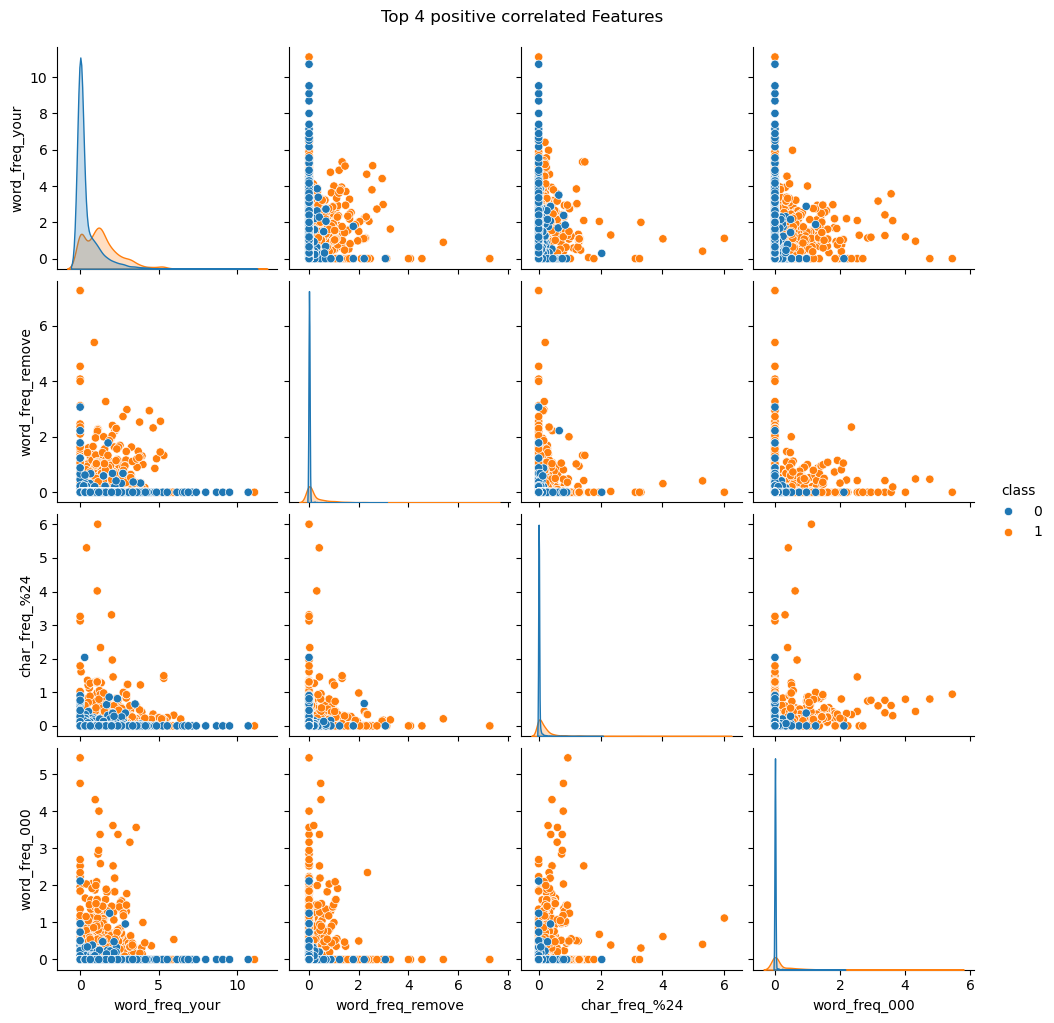

In [9]:
sns.pairplot(df[list(top_pos)[:4] + ['class']], hue='class')
plt.suptitle("Top 4 positive correlated Features", y=1.02)
plt.show()

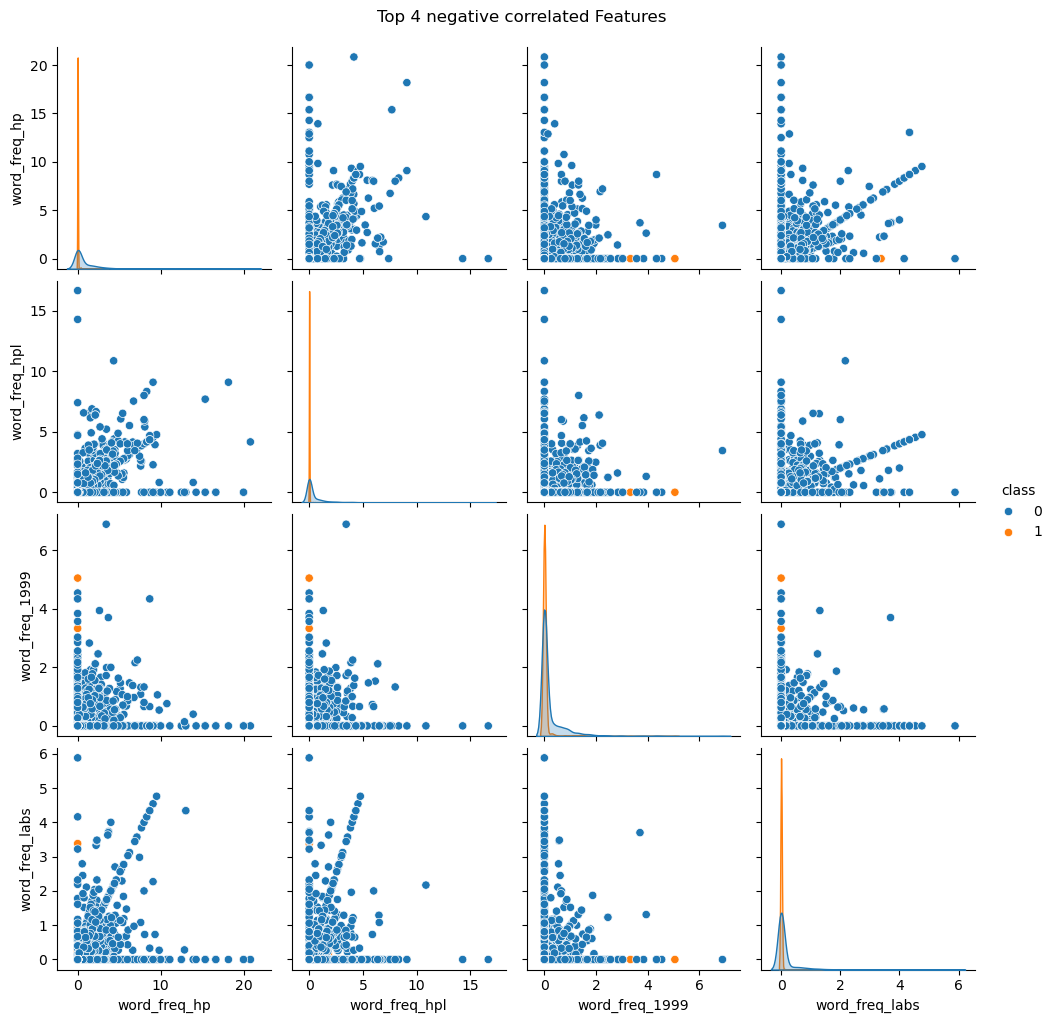

In [10]:
sns.pairplot(df[list(top_neg)[:4] + ['class']], hue='class')
plt.suptitle("Top 4 negative correlated Features", y=1.02)
plt.show()

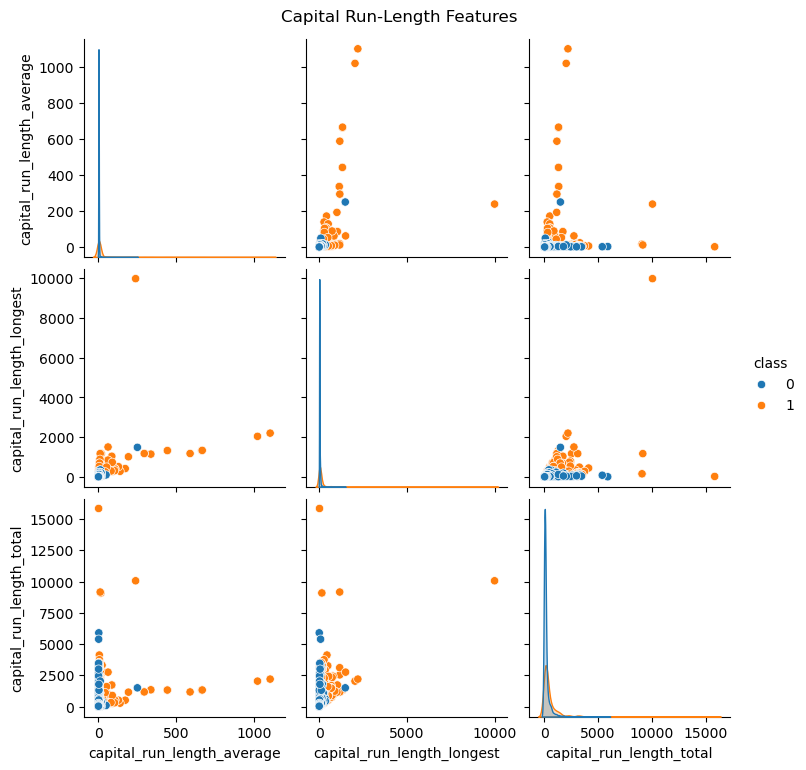

In [11]:
capital_cols = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
sns.pairplot(df[capital_cols + ['class']], hue='class')
plt.suptitle("Capital Run-Length Features", y=1.02)
plt.show()

Let's slightly Linear & Non Linear model to see the classification accuracy based on these features.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

x = df.drop('class', axis=1)
y = df['class']

In [13]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [14]:
LR = LogisticRegression()
DTC = tree.DecisionTreeClassifier(random_state=1)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=1)

In [16]:
from sklearn import metrics
LR.fit(x_train, y_train)
print('Accuracy Score: ',metrics.accuracy_score(y_test, LR.predict(x_test)))

Accuracy Score:  0.9113222486144101


In [17]:
print('Classification Report:\n',metrics.classification_report(y_test, LR.predict(x_test)))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       760
           1       0.92      0.85      0.88       503

    accuracy                           0.91      1263
   macro avg       0.91      0.90      0.91      1263
weighted avg       0.91      0.91      0.91      1263



In [18]:
print('Confusion Matrix:\n',metrics.confusion_matrix(y_test, LR.predict(x_test)))

Confusion Matrix:
 [[721  39]
 [ 73 430]]


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [20]:
DTC.fit(x_train, y_train)
print('Accuracy_score: ', metrics.accuracy_score(y_test, DTC.predict(x_test)))

Accuracy_score:  0.9065716547901821


In [21]:
import numpy as np

Feature Importance

word_freq_lab: 0.0000
word_freq_telnet: 0.0000
word_freq_857: 0.0000
word_freq_415: 0.0000
word_freq_cs: 0.0000
word_freq_pm: 0.0000
word_freq_labs: 0.0011
word_freq_make: 0.0011
word_freq_people: 0.0012
word_freq_address: 0.0013
word_freq_addresses: 0.0013
word_freq_credit: 0.0014
word_freq_original: 0.0014
word_freq_hpl: 0.0014
word_freq_85: 0.0022
word_freq_over: 0.0023
word_freq_data: 0.0027
word_freq_technology: 0.0029
word_freq_all: 0.0035
word_freq_000: 0.0042
word_freq_mail: 0.0042
word_freq_order: 0.0043
word_freq_650: 0.0049
word_freq_receive: 0.0054
word_freq_business: 0.0059
word_freq_internet: 0.0075
word_freq_re: 0.0096
word_freq_money: 0.0106
char_freq_%28: 0.0106
word_freq_meeting: 0.0125
word_freq_our: 0.0127
word_freq_1999: 0.0132
word_freq_email: 0.0149
word_freq_your: 0.0172
capital_run_length_longest: 0.0172
word_freq_you: 0.0210
capital_run_length_average: 0.0217
word_freq_george: 0.0245
word_freq_edu: 0.0309
word_freq_free: 0.0401
capital_run_

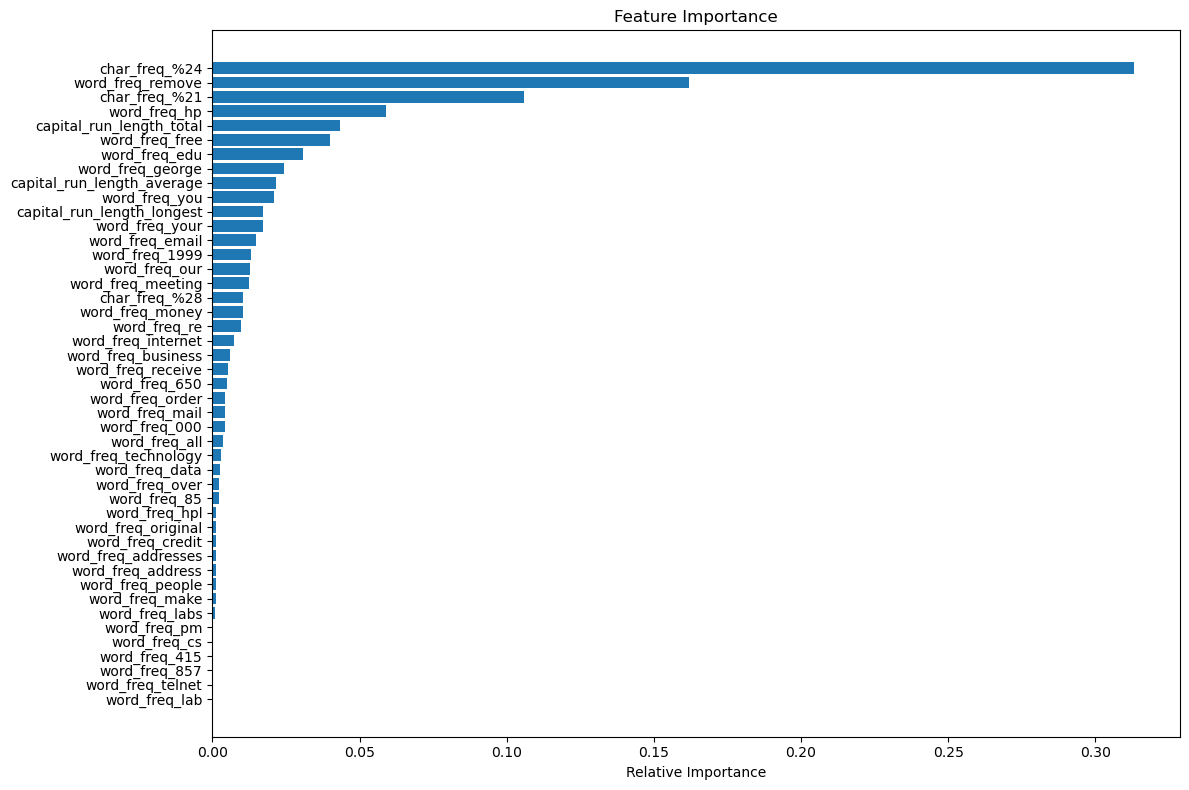

In [22]:
feat_imp = DTC.feature_importances_
feature_names = x.columns.tolist()
indices = np.argsort(feat_imp)

print('Feature Importance\n')
for i in indices:
    print(f'{feature_names[i]}: {feat_imp[i]:.4f}')

plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feat_imp[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

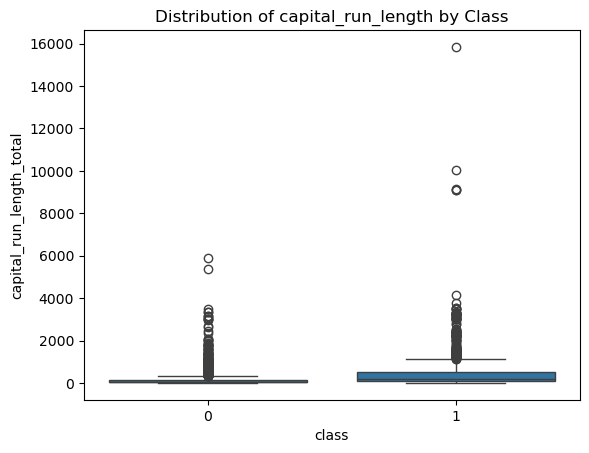

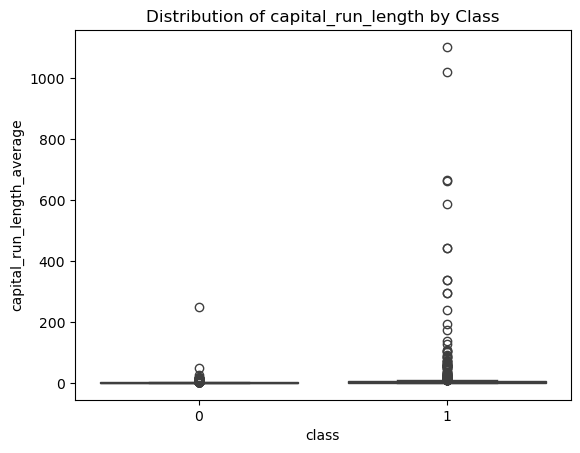

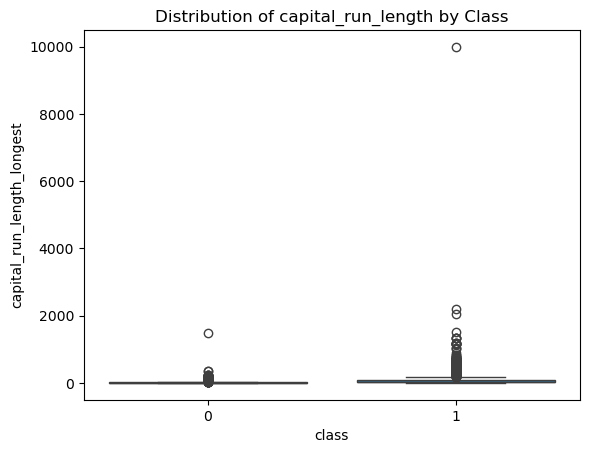

In [25]:
top_features = ['capital_run_length_total', 'capital_run_length_average', 'capital_run_length_longest']

for col in top_features:
    sns.boxplot(data=df, x='class', y=col)
    plt.title("Distribution of capital_run_length by Class")
    plt.show()

Asyou can see, also capital letters in spam emails more than non_spam emails.

Let's also check for multicollinearity as we will examine the model with those also that we will get after VIF Analysis

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
x = df.drop('class', axis=1)

while True:
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > 10:
        print('Variance Inflation Factor: ',vif)
        print(f'\nDropping {x.columns[maxloc]} in index {str(maxloc)}')
        x = x.drop(x.columns[maxloc], axis=1)
    else:
        break

print('\n\nColumns without multicollinearity: ', x.columns)
x.to_csv('spambase_after_VIF_Analysis', index=False)

Variance Inflation Factor:  [np.float64(1.219236287816857), np.float64(1.1674057163877116), np.float64(1.3850742467722215), np.float64(1.2950505598752633), np.float64(1.1903254429893848), np.float64(1.2111122940557413), np.float64(1.17283359489717), np.float64(1.3084468337612531), np.float64(1.2663594212981117), np.float64(1.2853969759076982), np.float64(1.1760877815165753), np.float64(1.3714468668619049), np.float64(1.1711400348827743), np.float64(1.3260115855933972), np.float64(1.3214777203701484), np.float64(2.041340734957101), np.float64(1.1111455852948444), np.float64(1.9069059119770506), np.float64(1.4350208693728597), np.float64(1.1614689919193895), np.float64(1.6602307342663216), np.float64(1.6076205931024918), np.float64(1.076497225275019), np.float64(1.9514075229281367), np.float64(1.806783039087098), np.float64(2.183334864628744), np.float64(2.2264940706870857), np.float64(103.28677878461556), np.float64(1.0333135932278572), np.float64(101.65495788288021), np.float64(1.72354

So finally we have set multiple dataset for modeling! Let's enjoy further!